# Naive Bayes Classifier
---

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math

## Importing Training and Test Datasets

In [2]:
#IMPORTING CLEANED TRAIN DATASET USING OVERSAMPLING
oversampled_train = pd.read_csv("oversampled_train.csv", index_col=0)
oversampled_train

,mmbtu,daren,http,robert,sitara,texas,april,july,gary,tenaska,...,tommy,dorcheus,tennessee,ellis,offsystem,solmonson,australia,ifhsc,connevey,Label
enron,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
oversampled_train['Label'].value_counts(normalize=True)

1    0.5
0    0.5
Name: Label, dtype: float64

In [4]:
#IMPORTING CLEANED TRAIN DATASET USING UNDERSAMPLING
undersampled_train = pd.read_csv("undersampled_train.csv", index_col=0)
undersampled_train

,mmbtu,daren,http,robert,sitara,texas,april,july,gary,tenaska,...,tommy,dorcheus,tennessee,ellis,offsystem,solmonson,australia,ifhsc,connevey,Label
enron,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
undersampled_train['Label'].value_counts(normalize=True)

1    0.5
0    0.5
Name: Label, dtype: float64

In [6]:
#IMPORTING CLEANED TRAIN DATASET USING SMOTEENN
smoteenn_train = pd.read_csv("smoteenn_train.csv", index_col=0)
smoteenn_train

,mmbtu,daren,http,robert,sitara,texas,april,july,gary,tenaska,...,tommy,dorcheus,tennessee,ellis,offsystem,solmonson,australia,ifhsc,connevey,Label
enron,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
0,0,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
smoteenn_train['Label'].value_counts(normalize=True)

1    0.538977
0    0.461023
Name: Label, dtype: float64

In [8]:
#IMPORTING CLEANED TRAIN DATASET USING SMOTETOMEK
smote_tomek_train = pd.read_csv("smote_tomek_train.csv", index_col=0)
smote_tomek_train

,mmbtu,daren,http,robert,sitara,texas,april,july,gary,tenaska,...,tommy,dorcheus,tennessee,ellis,offsystem,solmonson,australia,ifhsc,connevey,Label
enron,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
smote_tomek_train['Label'].value_counts(normalize=True)

1    0.5
0    0.5
Name: Label, dtype: float64

In [10]:
#IMPORTING CLEANED TEST DATASET
test = pd.read_csv("test_data.csv", index_col = 0)
test

,mmbtu,daren,http,robert,sitara,texas,april,july,gary,tenaska,...,tommy,dorcheus,tennessee,ellis,offsystem,solmonson,australia,ifhsc,connevey,Label
enron,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
test['Label'].value_counts(normalize=True)

0    0.724638
1    0.275362
Name: Label, dtype: float64

## Naive Bayes Classifier Function

In [12]:
table1 = pd.DataFrame()
table2 = pd.DataFrame()

In [13]:
def Score(table, data, p_spam, p_non_spam, parameters_spam, parameters_non_spam, title, dataset):

    TP = 0 # True Positive
    FP = 0 # False Positive
    TN = 0 # True Negative
    FN = 0 # False Negative
    row = 0

    for i in range(len(data)):
        message = data.iloc[row:row+1, :-1]
        word_count = message.sum()
        p_spam_given_message = p_spam
        p_non_spam_given_message = p_non_spam
        col = 0

        for word in message:
            if word in parameters_spam:
                for count in range(word_count[col]):
                    p_spam_given_message += math.log(parameters_spam[word])
            if word in parameters_non_spam:
                for count in range(word_count[col]):
                    p_non_spam_given_message += math.log(parameters_non_spam[word])
            col += 1;

        if p_non_spam_given_message >= p_spam_given_message:
            if data.iloc[row:row+1,-1:].sum().sum() == 0:
                TN += 1
            else:
                FN += 1

        elif p_spam_given_message > p_non_spam_given_message:
            if data.iloc[row:row+1,-1:].sum().sum() == 1:
                TP += 1
            else:
                FP += 1

        row += 1

    Confusion_Matrix = [[TN, FP],
                        [FN, TP]]

    Correct = TP + TN
    Incorrect = FP + FN
    Accuracy = (TN + TP) / (TN + FP + TP + FN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1_Score = (2 * Precision * Recall) / (Precision + Recall)

    f = plt.figure(figsize = (8,8))
    cm_df = pd.DataFrame(Confusion_Matrix, range(2), range(2))
    sb.heatmap(cm_df, annot=True, fmt=".0f", annot_kws={"size": 16})

    stats_text = "\n\nCorrect={}\nIncorrect={}\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        Correct, Incorrect, Accuracy, Precision, Recall, F1_Score)
    
    plt.xlabel('Predicted' + stats_text)
    plt.ylabel('Actual')
    plt.title(title + ' ' + dataset)

    scores = []
    scores.append(Accuracy)
    scores.append(Precision)
    scores.append(Recall)
    scores.append(F1_Score)
    scores = pd.DataFrame(scores)
    table = pd.concat([table,scores], axis = 1)

    return table

In [14]:
def Naive_Bayes_Classifier(table1, table2, train, test, title):
    
    # Create Vocabulary
    vocabulary = list(train.columns)
    vocabulary.remove('Label')
    print("Vocabulary length:", len(vocabulary))

    # Isolating spam and non-spam messages first
    spam_messages = train[train['Label'] == 1]
    non_spam_messages = train[train['Label'] == 0]

    # P(Spam) and P(Non-Spam)
    p_spam = len(spam_messages) / len(train)
    p_non_spam = len(non_spam_messages) / len(train)

    # N_Spam
    n_spam = spam_messages.iloc[:,1:-1].sum().sum()

    # N_Non-Spam
    n_non_spam = non_spam_messages.iloc[:,1:-1].sum().sum()

    # N_Vocabulary
    n_vocabulary = len(vocabulary)

    # Laplace smoothing
    alpha = 1

    # Initiate parameters
    parameters_spam = {unique_word:0 for unique_word in vocabulary}
    parameters_non_spam = {unique_word:0 for unique_word in vocabulary}

    # Calculate parameters
    for word in vocabulary:
        n_word_given_spam = spam_messages[word].sum() # spam_messages already defined
        p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
        parameters_spam[word] = p_word_given_spam

        n_word_given_non_spam = non_spam_messages[word].sum() # non_spam_messages already defined
        p_word_given_non_spam = (n_word_given_non_spam + alpha) / (n_non_spam + alpha*n_vocabulary)
        parameters_non_spam[word] = p_word_given_non_spam

    TP = 0 # True Positive
    FP = 0 # False Positive
    TN = 0 # True Negative
    FN = 0 # False Negative
    row = 0

    table1 = Score(table1, train, p_spam, p_non_spam, parameters_spam, parameters_non_spam, title, "(TRAIN)")
    table2 = Score(table2, test, p_spam, p_non_spam, parameters_spam, parameters_non_spam, title, "(TEST)")

    return table1, table2

Vocabulary length: 487


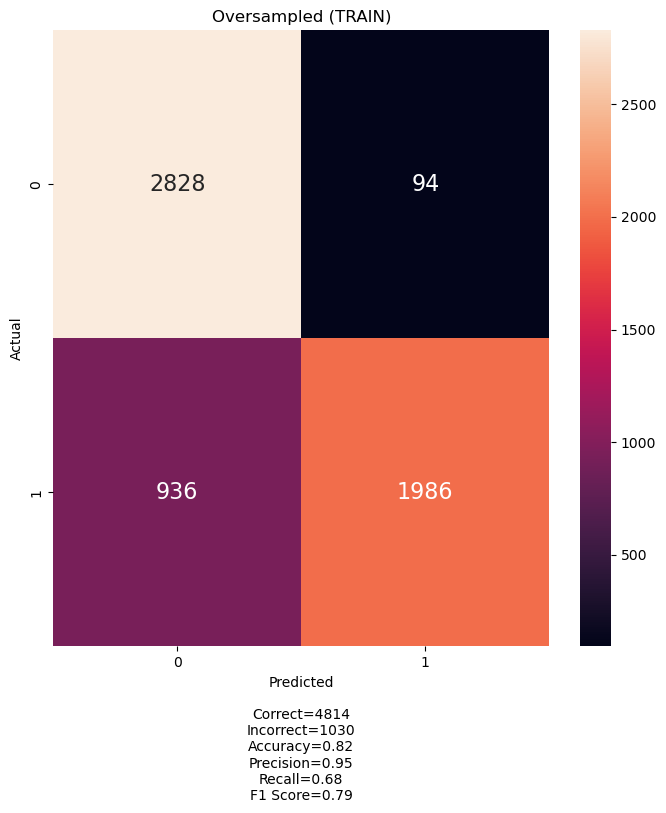

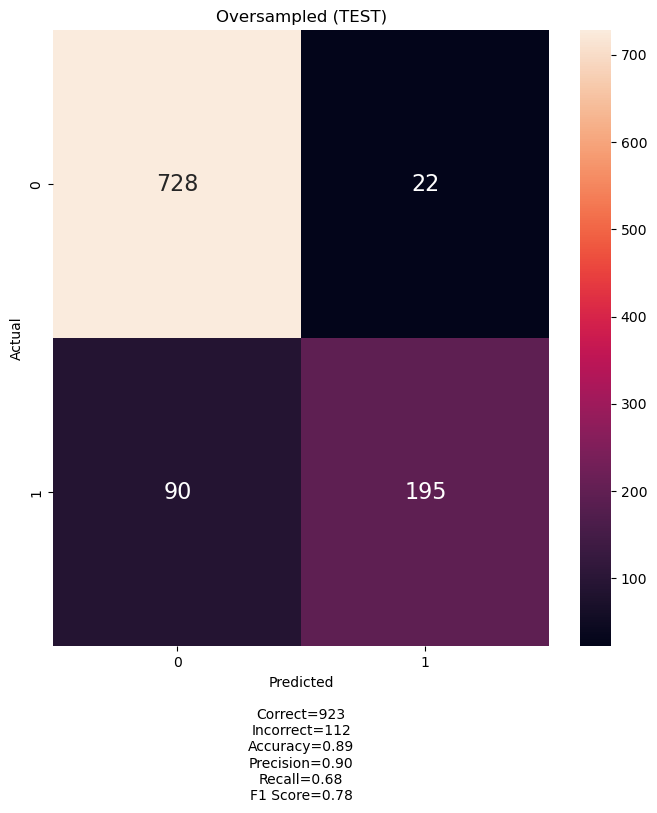

In [15]:
table1, table2 = Naive_Bayes_Classifier(table1, table2, oversampled_train, test, "Oversampled")

Vocabulary length: 487


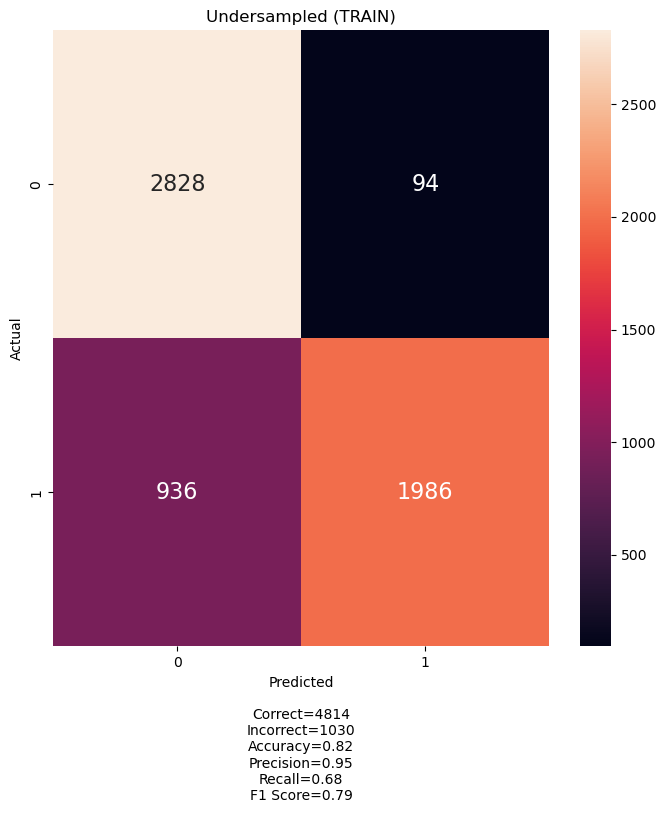

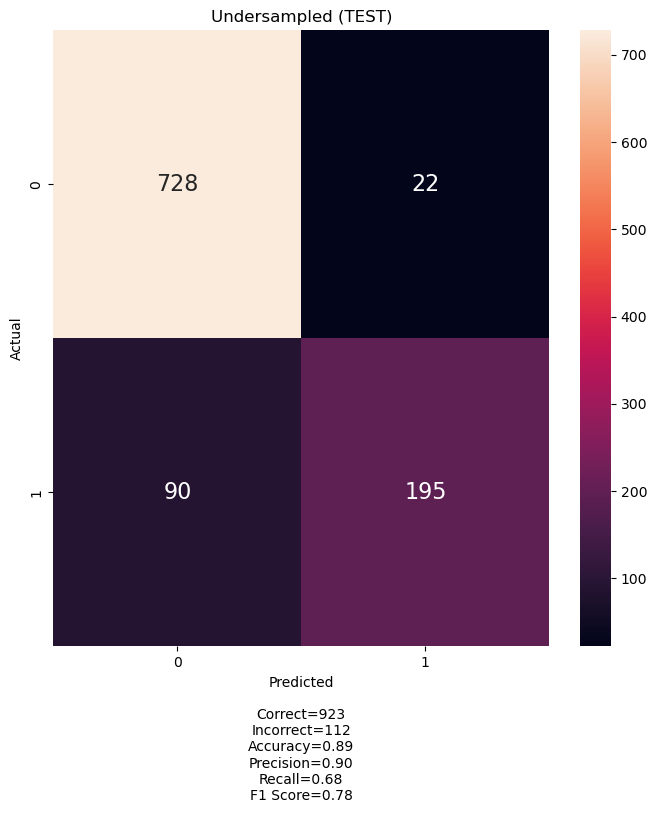

In [16]:
table1, table2 = Naive_Bayes_Classifier(table1, table2, undersampled_train, test, "Undersampled")

Vocabulary length: 487


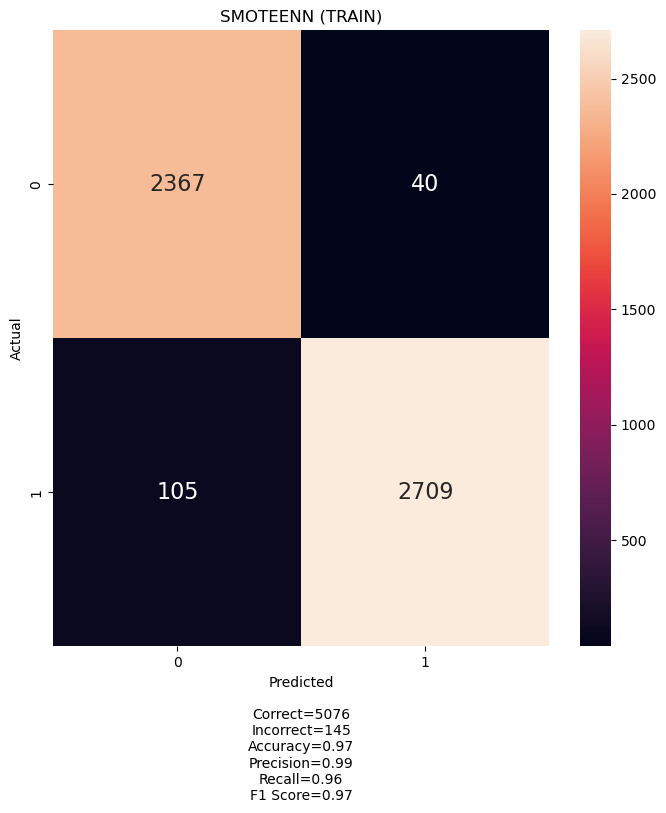

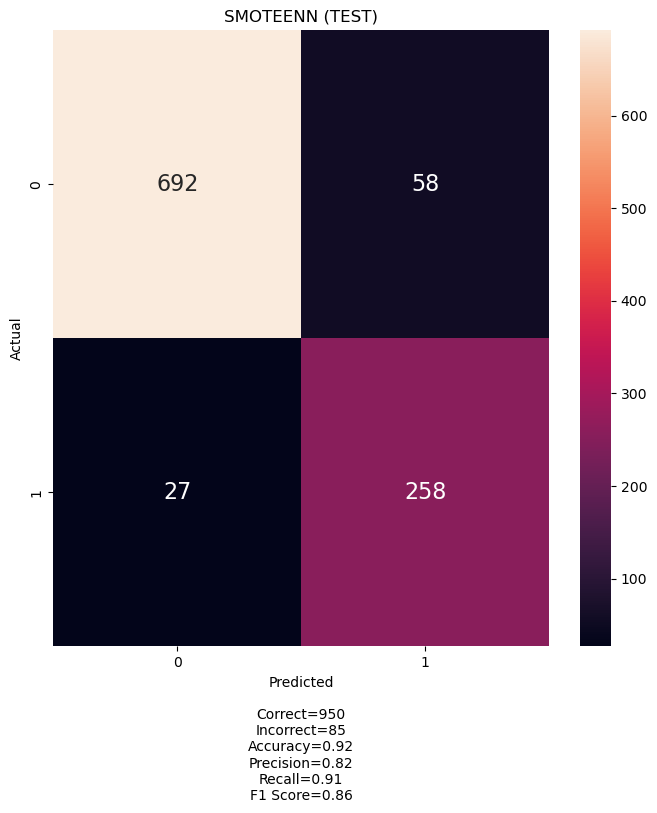

In [17]:
table1, table2 = Naive_Bayes_Classifier(table1, table2, smoteenn_train, test, "SMOTEENN")

Vocabulary length: 487


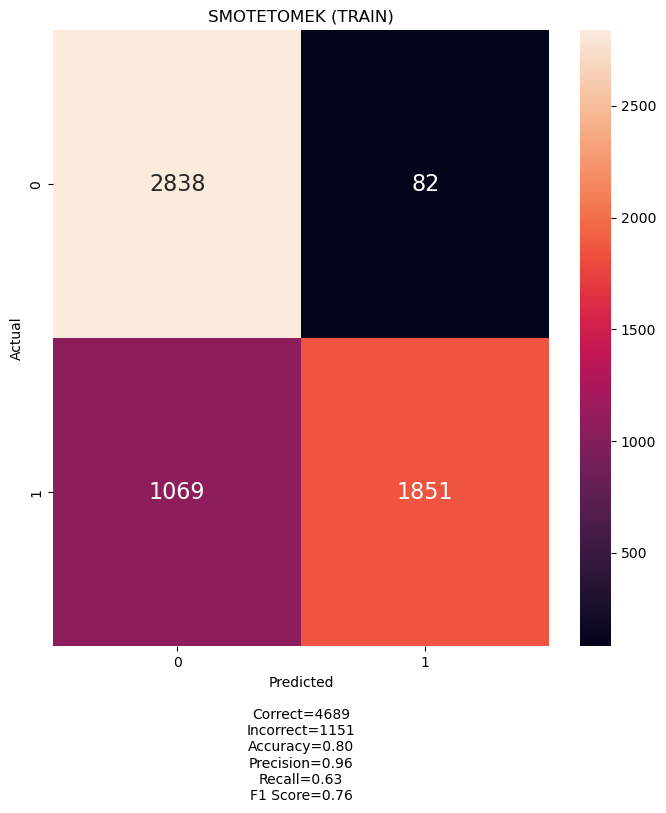

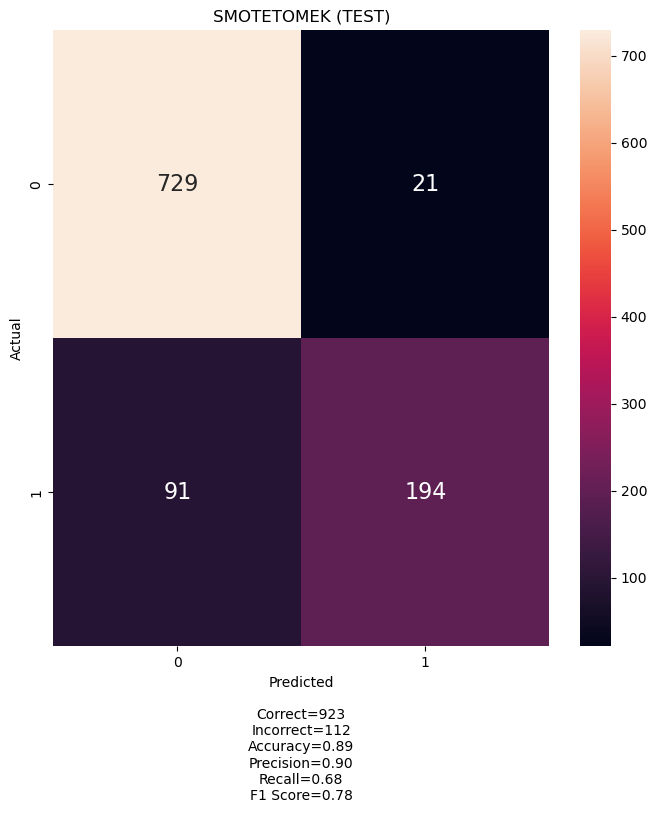

In [18]:
table1, table2 = Naive_Bayes_Classifier(table1, table2, smote_tomek_train, test, "SMOTETOMEK")

## Accuracy, Precision, Recall & F1 Score of Train Datasets

In [19]:
def draw_figure(table, row, title):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.ylim([0,1])
    splot = sb.barplot(x = ['Oversampling','Undersampling','SMOTEENN','SMOTETomek'], y = table.iloc[row,:])
    for p in splot.patches:
        if p.get_height() == 0:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        else:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, -12), 
                           textcoords = 'offset points')

In [20]:
table1 = table1.set_axis(['Oversampling','Undersampling','SMOTEENN','SMOTETomek'], axis = 1)
table1 = table1.set_axis(['Accuracy','Precision','Recall','F1 Score'], axis = 0)
table1

,Oversampling,Undersampling,SMOTEENN,SMOTETomek
Accuracy,0.823751,0.823751,0.972228,0.802911
Precision,0.954808,0.954808,0.985449,0.957579
Recall,0.679671,0.679671,0.962687,0.633904
F1 Score,0.794082,0.794082,0.973935,0.762827


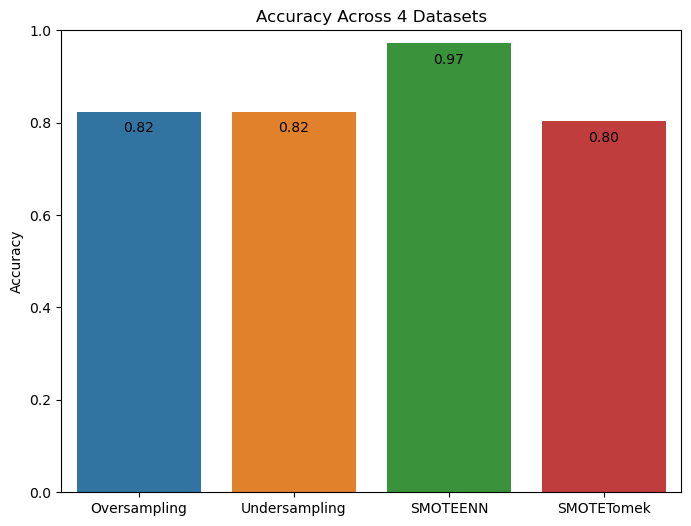

In [21]:
draw_figure(table1, 0, "Accuracy Across 4 Datasets")

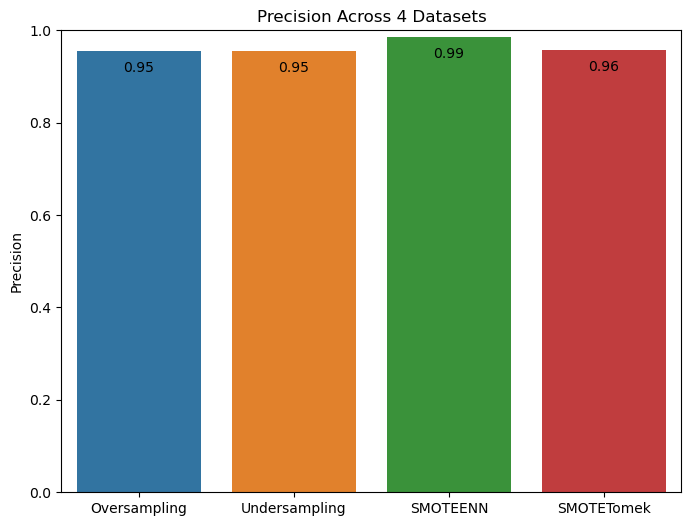

In [22]:
draw_figure(table1, 1, "Precision Across 4 Datasets")

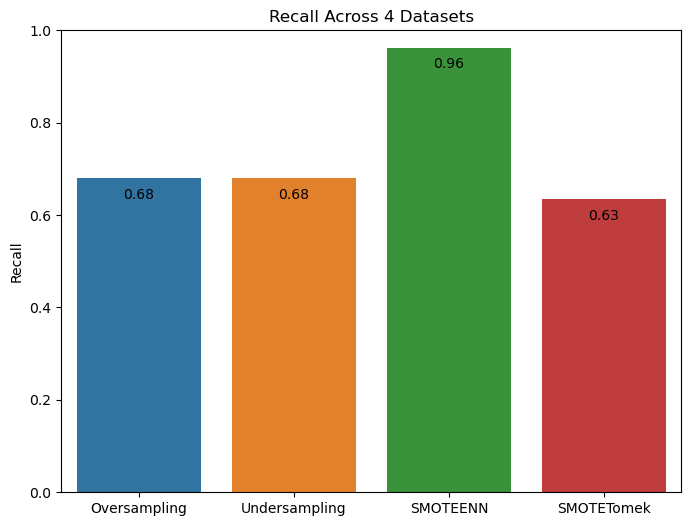

In [23]:
draw_figure(table1, 2, "Recall Across 4 Datasets")

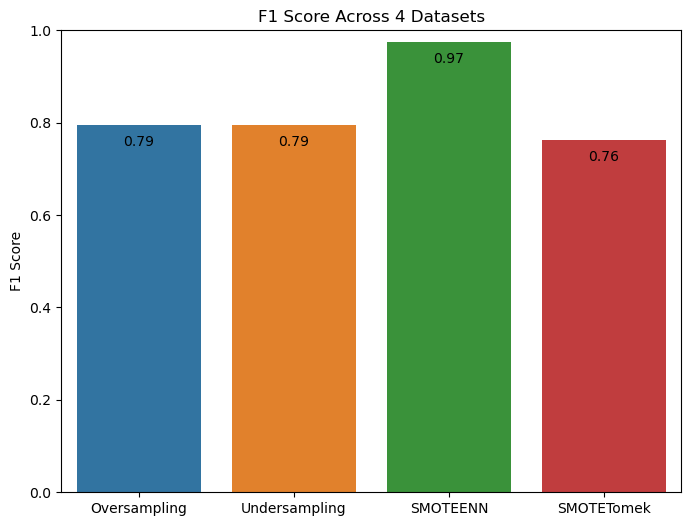

In [24]:
draw_figure(table1, 3, "F1 Score Across 4 Datasets")

## Accuracy, Precision, Recall & F1 Score of Test Datasets

In [25]:
table2 = table2.set_axis(['Oversampling','Undersampling','SMOTEENN','SMOTETomek'], axis = 1)
table2 = table2.set_axis(['Accuracy','Precision','Recall','F1 Score'], axis = 0)
table2

,Oversampling,Undersampling,SMOTEENN,SMOTETomek
Accuracy,0.891787,0.891787,0.917874,0.891787
Precision,0.898618,0.898618,0.816456,0.902326
Recall,0.684211,0.684211,0.905263,0.680702
F1 Score,0.776892,0.776892,0.858569,0.776000


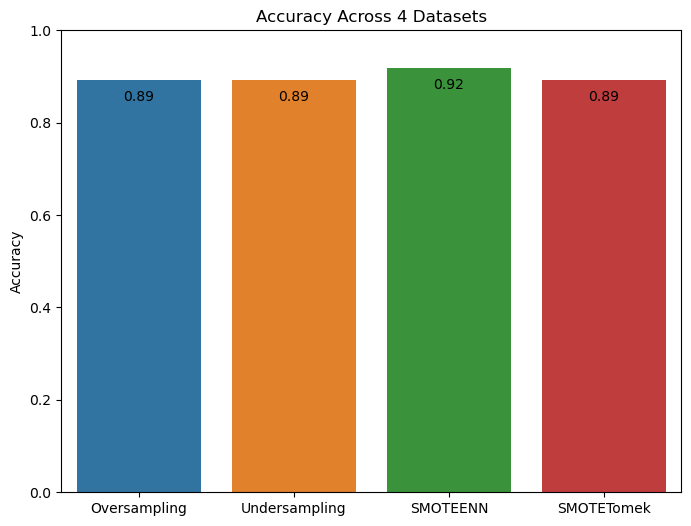

In [26]:
draw_figure(table2, 0, "Accuracy Across 4 Datasets")

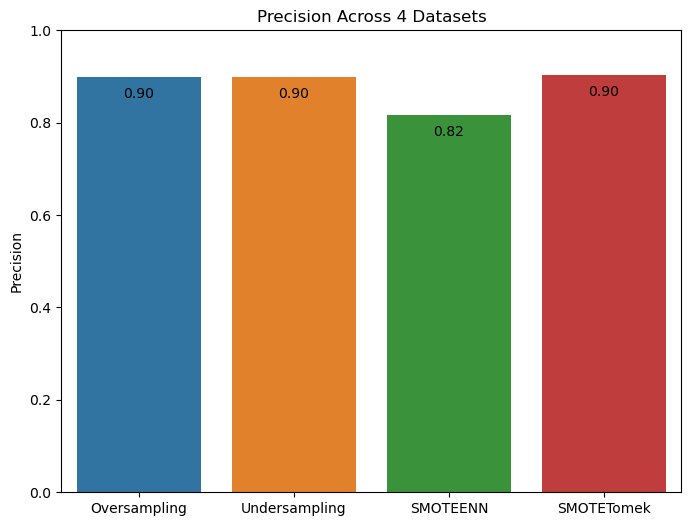

In [27]:
draw_figure(table2, 1, "Precision Across 4 Datasets")

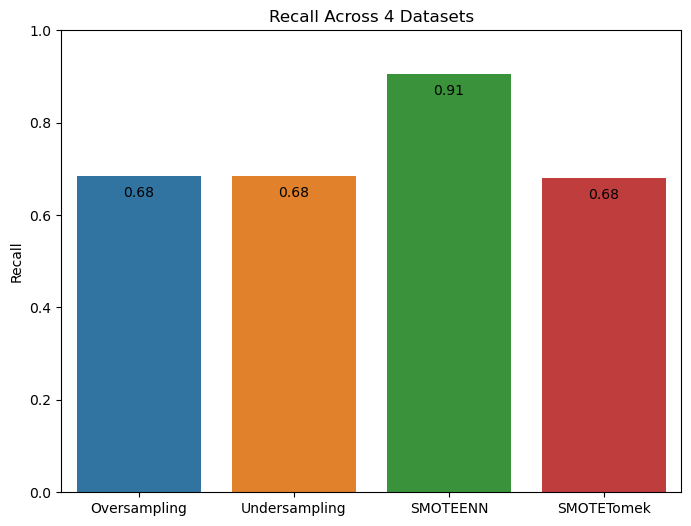

In [28]:
draw_figure(table2, 2, "Recall Across 4 Datasets")

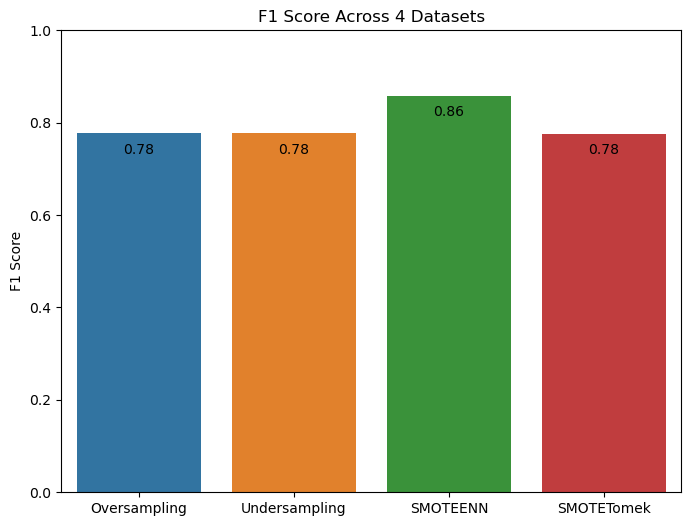

In [29]:
draw_figure(table2, 3, "F1 Score Across 4 Datasets")

---
> For spam classification, the number of false positives is significant, as the classification of non-spam emails as spam can be an undesirable outcome. Hence, across the 4 training datasets, SMOTEENN has the highest number of false positives (58) which makes it the worst training dataset, whereas SMOTETomek has the lowest number of false positives (21) which makes it the best training dataset.

> Also, in the case where the model encounters a word that is not in the vocabulary list, it simply ignores the new word as adding it in the current vocabulary list could affect the accuracy of future classifications, since the model has not been properly trained on the new word.